In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
plt.rcParams["font.sans-serif"] = ["Simhei"]
plt.rcParams["axes.unicode_minus"] = False

In [2]:
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":500,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

## 数据大小

In [3]:
df_pb = pd.read_excel('1.2铅钡.xlsx')
df_cor1 = df_pb.iloc[:, 4:-1]
df_k = pd.read_excel('1.2高钾.xlsx')
df_cor2 = df_k.iloc[:, 4:-1]
print('铅钡型玻璃',df_cor2.shape[0],'个数据点')
print('高钾型玻璃',df_cor1.shape[0],'个数据点')
print('一共',df_cor2.shape[1],'个化学成分')

铅钡型玻璃 18 个数据点
高钾型玻璃 49 个数据点
一共 14 个化学成分


## 检验正态分布

In [4]:
def JB(X):
    result = stats.jarque_bera(X)
    return pd.Series(result, index=['JB', 'pvalue']).round(4)
JB_test = df_cor1.apply(JB)
print('对铅钡型玻璃进行Jarque‐Bera的正态分布检测结果\n')
print(pd.DataFrame(JB_test.iloc[1,:] > 0.05))

对铅钡型玻璃进行Jarque‐Bera的正态分布检测结果

             pvalue
二氧化硅(SiO2)     True
氧化钠(Na2O)     False
氧化钾(K2O)      False
氧化钙(CaO)       True
氧化镁(MgO)       True
氧化铝(Al2O3)    False
氧化铁(Fe2O3)    False
氧化铜(CuO)      False
氧化铅(PbO)       True
氧化钡(BaO)      False
五氧化二磷(P2O5)   False
氧化锶(SrO)       True
氧化锡(SnO2)     False
二氧化硫(SO2)     False


In [5]:
def SW(X):
    result = stats.shapiro(X)
    return pd.Series(result, index=['SW', 'pvalue']).round(4)
SW_test = df_cor2.apply(SW)
print('对高钾型玻璃进行Shapiro-Wilk的正态分布检测结果\n')
print(pd.DataFrame(SW_test.iloc[1,:] > 0.05))

对高钾型玻璃进行Shapiro-Wilk的正态分布检测结果

             pvalue
二氧化硅(SiO2)    False
氧化钠(Na2O)     False
氧化钾(K2O)      False
氧化钙(CaO)      False
氧化镁(MgO)      False
氧化铝(Al2O3)     True
氧化铁(Fe2O3)    False
氧化铜(CuO)       True
氧化铅(PbO)      False
氧化钡(BaO)      False
五氧化二磷(P2O5)   False
氧化锶(SrO)      False
氧化锡(SnO2)     False
二氧化硫(SO2)     False


## 计算spearman相关系数并检验p值

In [6]:
correlations1 = df_cor1.corr('spearman')
correlations1.fillna(0,inplace=True)
correlations2 = df_cor2.corr('spearman')
correlations2.fillna(0,inplace=True)

In [7]:
def PvalueGetSpearman(X, Y):
    return stats.spearmanr(X, Y)[1].round(4)
(df_cor1.corr(method=PvalueGetSpearman)>0.01)

二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)         True      False      True     False      True       False   
氧化钠(Na2O)         False       True      True     False      True        True   
氧化钾(K2O)           True       True      True      True      True       False   
氧化钙(CaO)          False      False      True      True      True        True   
氧化镁(MgO)           True       True      True      True      True       False   
氧化铝(Al2O3)        False       True     False      True     False        True   
氧化铁(Fe2O3)         True       True      True     False      True       False   
氧化铜(CuO)          False       True      True      True      True        True   
氧化铅(PbO)          False       True      True      True      True       False   
氧化钡(BaO)           True       True      True      True     False       False   
五氧化二磷(P2O5)       False      False      True     False      True        True   
氧化锶(SrO)          False       True      True      True      True        True   
氧化锡(SnO2)          True       True      True      True      True        True   
二氧化硫(SO2)          True       True      True      True     False       False   

             氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
二氧化硅(SiO2)         True     False     False      True        False     False   
氧化钠(Na2O)          True      True      True      True        False      True   
氧化钾(K2O)           True      True      True      True         True      True   
氧化钙(CaO)          False      True      True      True        False      True   
氧化镁(MgO)           True      True      True     False         True      True   
氧化铝(Al2O3)        False      True     False     False         True      True   
氧化铁(Fe2O3)         True     False      True     False         True      True   
氧化铜(CuO)          False      True      True     False         True      True   
氧化铅(PbO)           True      True      True      True         True      True   
氧化钡(BaO)          False     False      True      True         True      True   
五氧化二磷(P2O5)        True      True      True      True         True      True   
氧化锶(SrO)           True      True      True      True         True      True   
氧化锡(SnO2)          True      True      True      True         True      True   
二氧化硫(SO2)          True     False      True     False         True      True   

             氧化锡(SnO2)  二氧化硫(SO2)  
二氧化硅(SiO2)        True       True  
氧化钠(Na2O)         True       True  
氧化钾(K2O)          True       True  
氧化钙(CaO)          True       True  
氧化镁(MgO)          True      False  
氧化铝(Al2O3)        True      False  
氧化铁(Fe2O3)        True       True  
氧化铜(CuO)          True      False  
氧化铅(PbO)          True       True  
氧化钡(BaO)          True      False  
五氧化二磷(P2O5)       True       True  
氧化锶(SrO)          True       True  
氧化锡(SnO2)         True       True  
二氧化硫(SO2)         True       True

In [8]:
(df_cor2.corr(method=PvalueGetSpearman)>0.01)

二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)         True       True     False     False      True       False   
氧化钠(Na2O)          True       True     False     False      True        True   
氧化钾(K2O)          False      False      True     False      True        True   
氧化钙(CaO)          False      False     False      True      True        True   
氧化镁(MgO)           True       True      True      True      True       False   
氧化铝(Al2O3)        False       True      True      True     False        True   
氧化铁(Fe2O3)        False       True      True      True      True       False   
氧化铜(CuO)           True       True      True      True      True        True   
氧化铅(PbO)           True       True      True      True      True       False   
氧化钡(BaO)           True       True      True      True      True        True   
五氧化二磷(P2O5)        True       True      True      True     False        True   
氧化锶(SrO)           True       True      True      True     False        True   
氧化锡(SnO2)          True       True      True      True      True        True   
二氧化硫(SO2)          True       True      True      True      True        True   

             氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
二氧化硅(SiO2)        False      True      True      True         True      True   
氧化钠(Na2O)          True      True      True      True         True      True   
氧化钾(K2O)           True      True      True      True         True      True   
氧化钙(CaO)           True      True      True      True         True      True   
氧化镁(MgO)           True      True      True      True        False     False   
氧化铝(Al2O3)        False      True     False      True         True      True   
氧化铁(Fe2O3)         True     False      True      True         True      True   
氧化铜(CuO)          False      True      True      True         True      True   
氧化铅(PbO)           True      True      True     False         True      True   
氧化钡(BaO)           True      True     False      True         True      True   
五氧化二磷(P2O5)        True      True      True      True         True      True   
氧化锶(SrO)           True      True      True      True         True      True   
氧化锡(SnO2)          True      True      True      True         True      True   
二氧化硫(SO2)          True      True      True      True         True      True   

             氧化锡(SnO2)  二氧化硫(SO2)  
二氧化硅(SiO2)        True       True  
氧化钠(Na2O)         True       True  
氧化钾(K2O)          True       True  
氧化钙(CaO)          True       True  
氧化镁(MgO)          True       True  
氧化铝(Al2O3)        True       True  
氧化铁(Fe2O3)        True       True  
氧化铜(CuO)          True       True  
氧化铅(PbO)          True       True  
氧化钡(BaO)          True       True  
五氧化二磷(P2O5)       True       True  
氧化锶(SrO)          True       True  
氧化锡(SnO2)         True       True  
二氧化硫(SO2)         True       True

### 筛选出以0.01为p值阈值的相关性矩阵

In [9]:
Cor_p = df_cor1.corr(method=PvalueGetSpearman)
cor_p = correlations1[Cor_p>0.01].fillna(0)
Cor_k = df_cor2.corr(method=PvalueGetSpearman)
cor_k = correlations2[Cor_k>0.01].fillna(0)

## 对两组数据画出相关性热力图

In [10]:
# 绘制发散调色板用作cmap
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
cmap = sns.color_palette('vlag', as_cmap=True)
# cmap = sns.color_palette('coolwarm', as_cmap=True)

### 铅钡

### 原始热力图

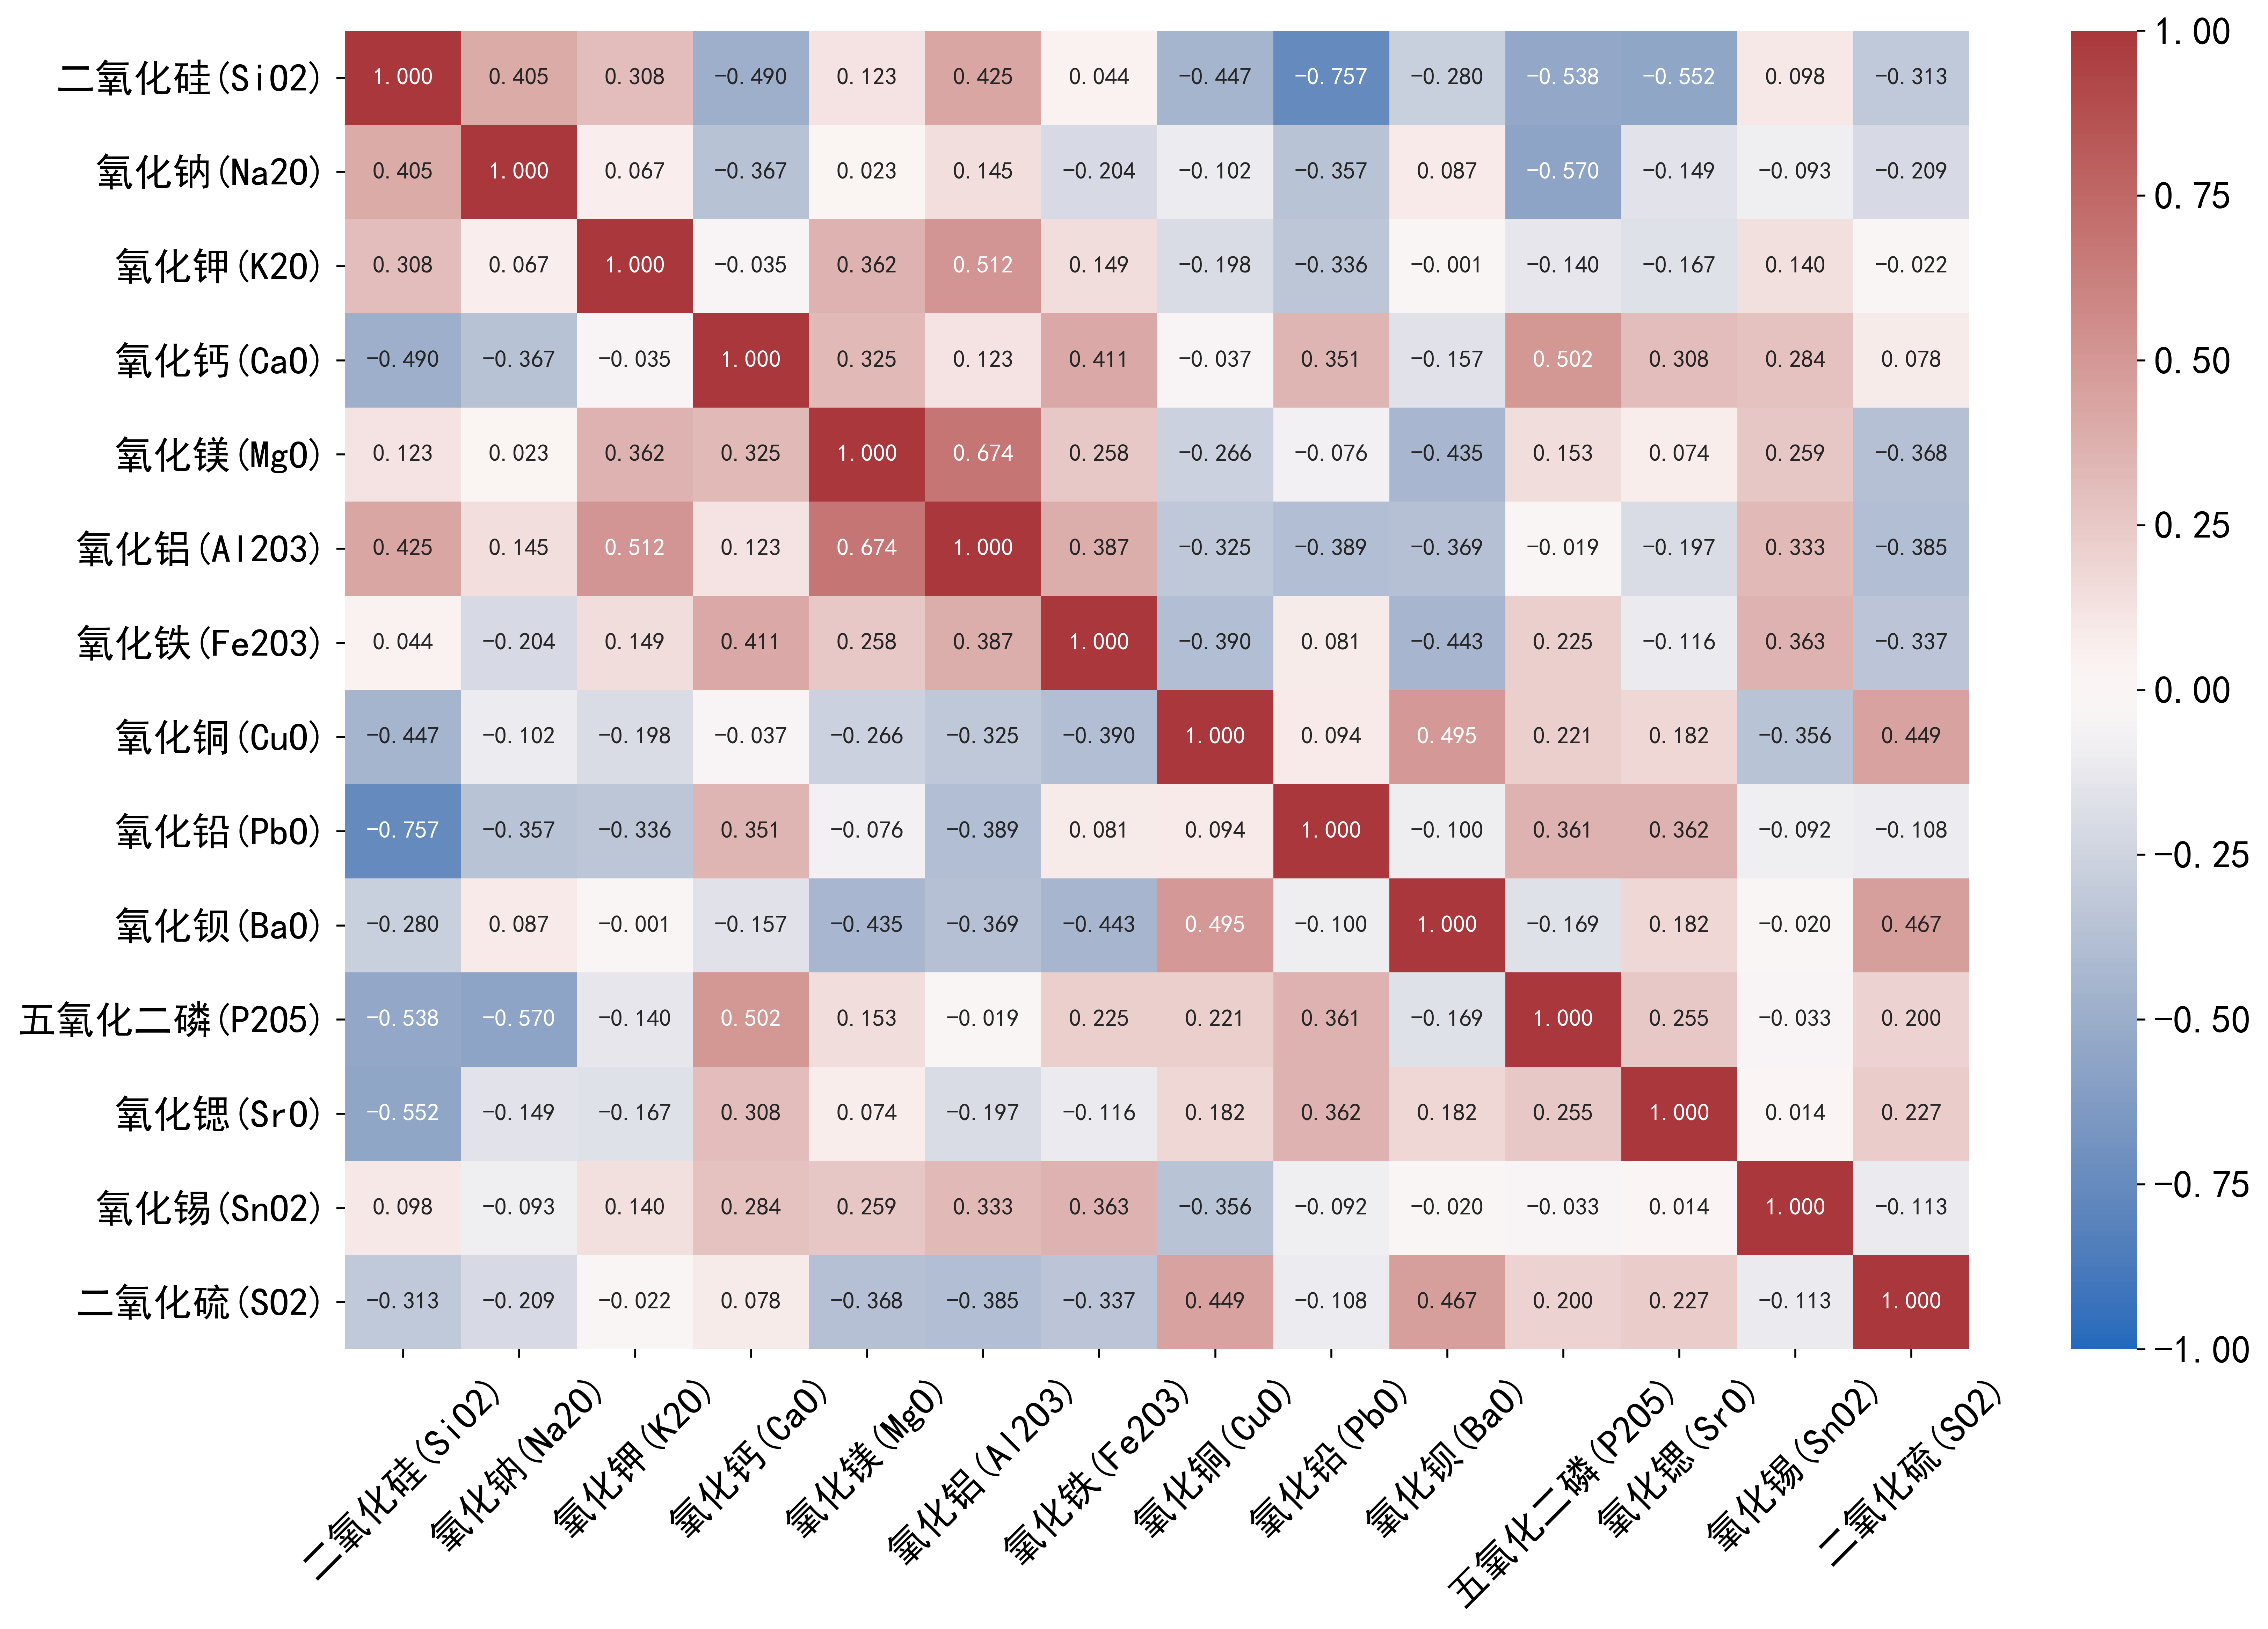

In [11]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(correlations1, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor1.columns, rotation=45)
ax.set_yticklabels(df_cor1.columns, rotation='horizontal')
#plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p')
plt.show()

### 0.01阈值的热力图

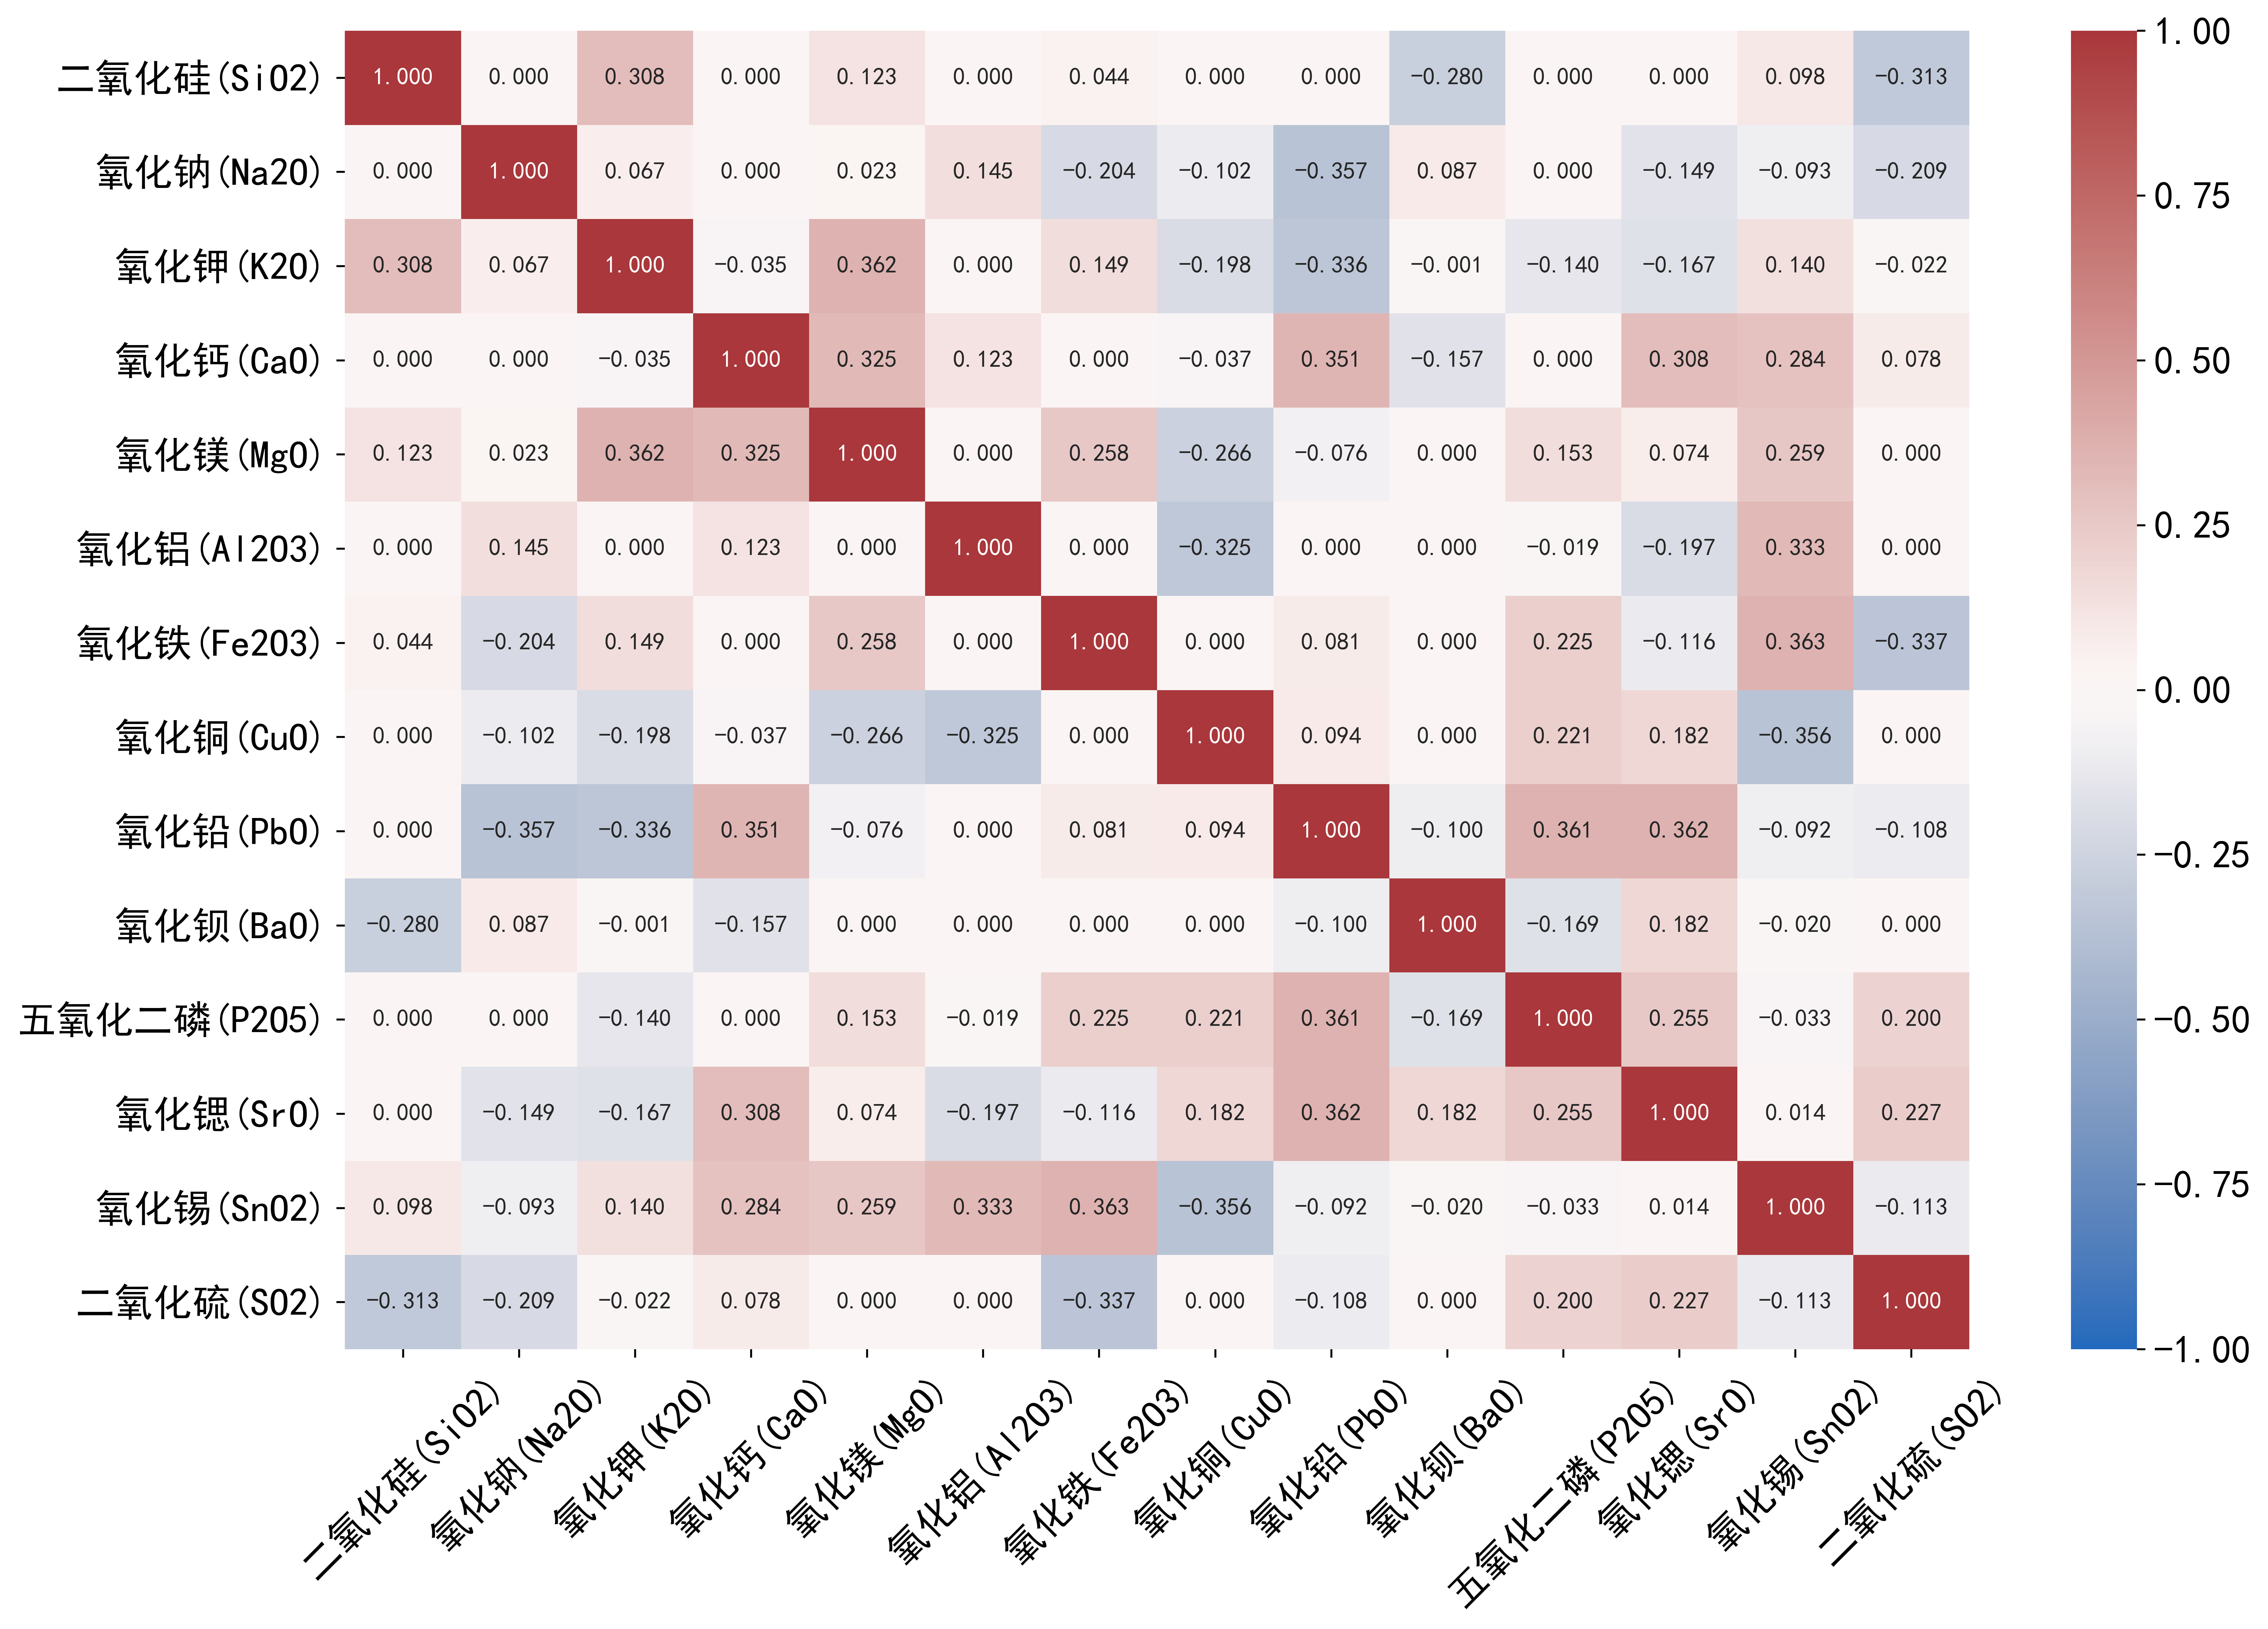

In [12]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(cor_p, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor1.columns, rotation=45)
ax.set_yticklabels(df_cor1.columns, rotation='horizontal')
#plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p')
plt.show()

### 高钾

### 原始

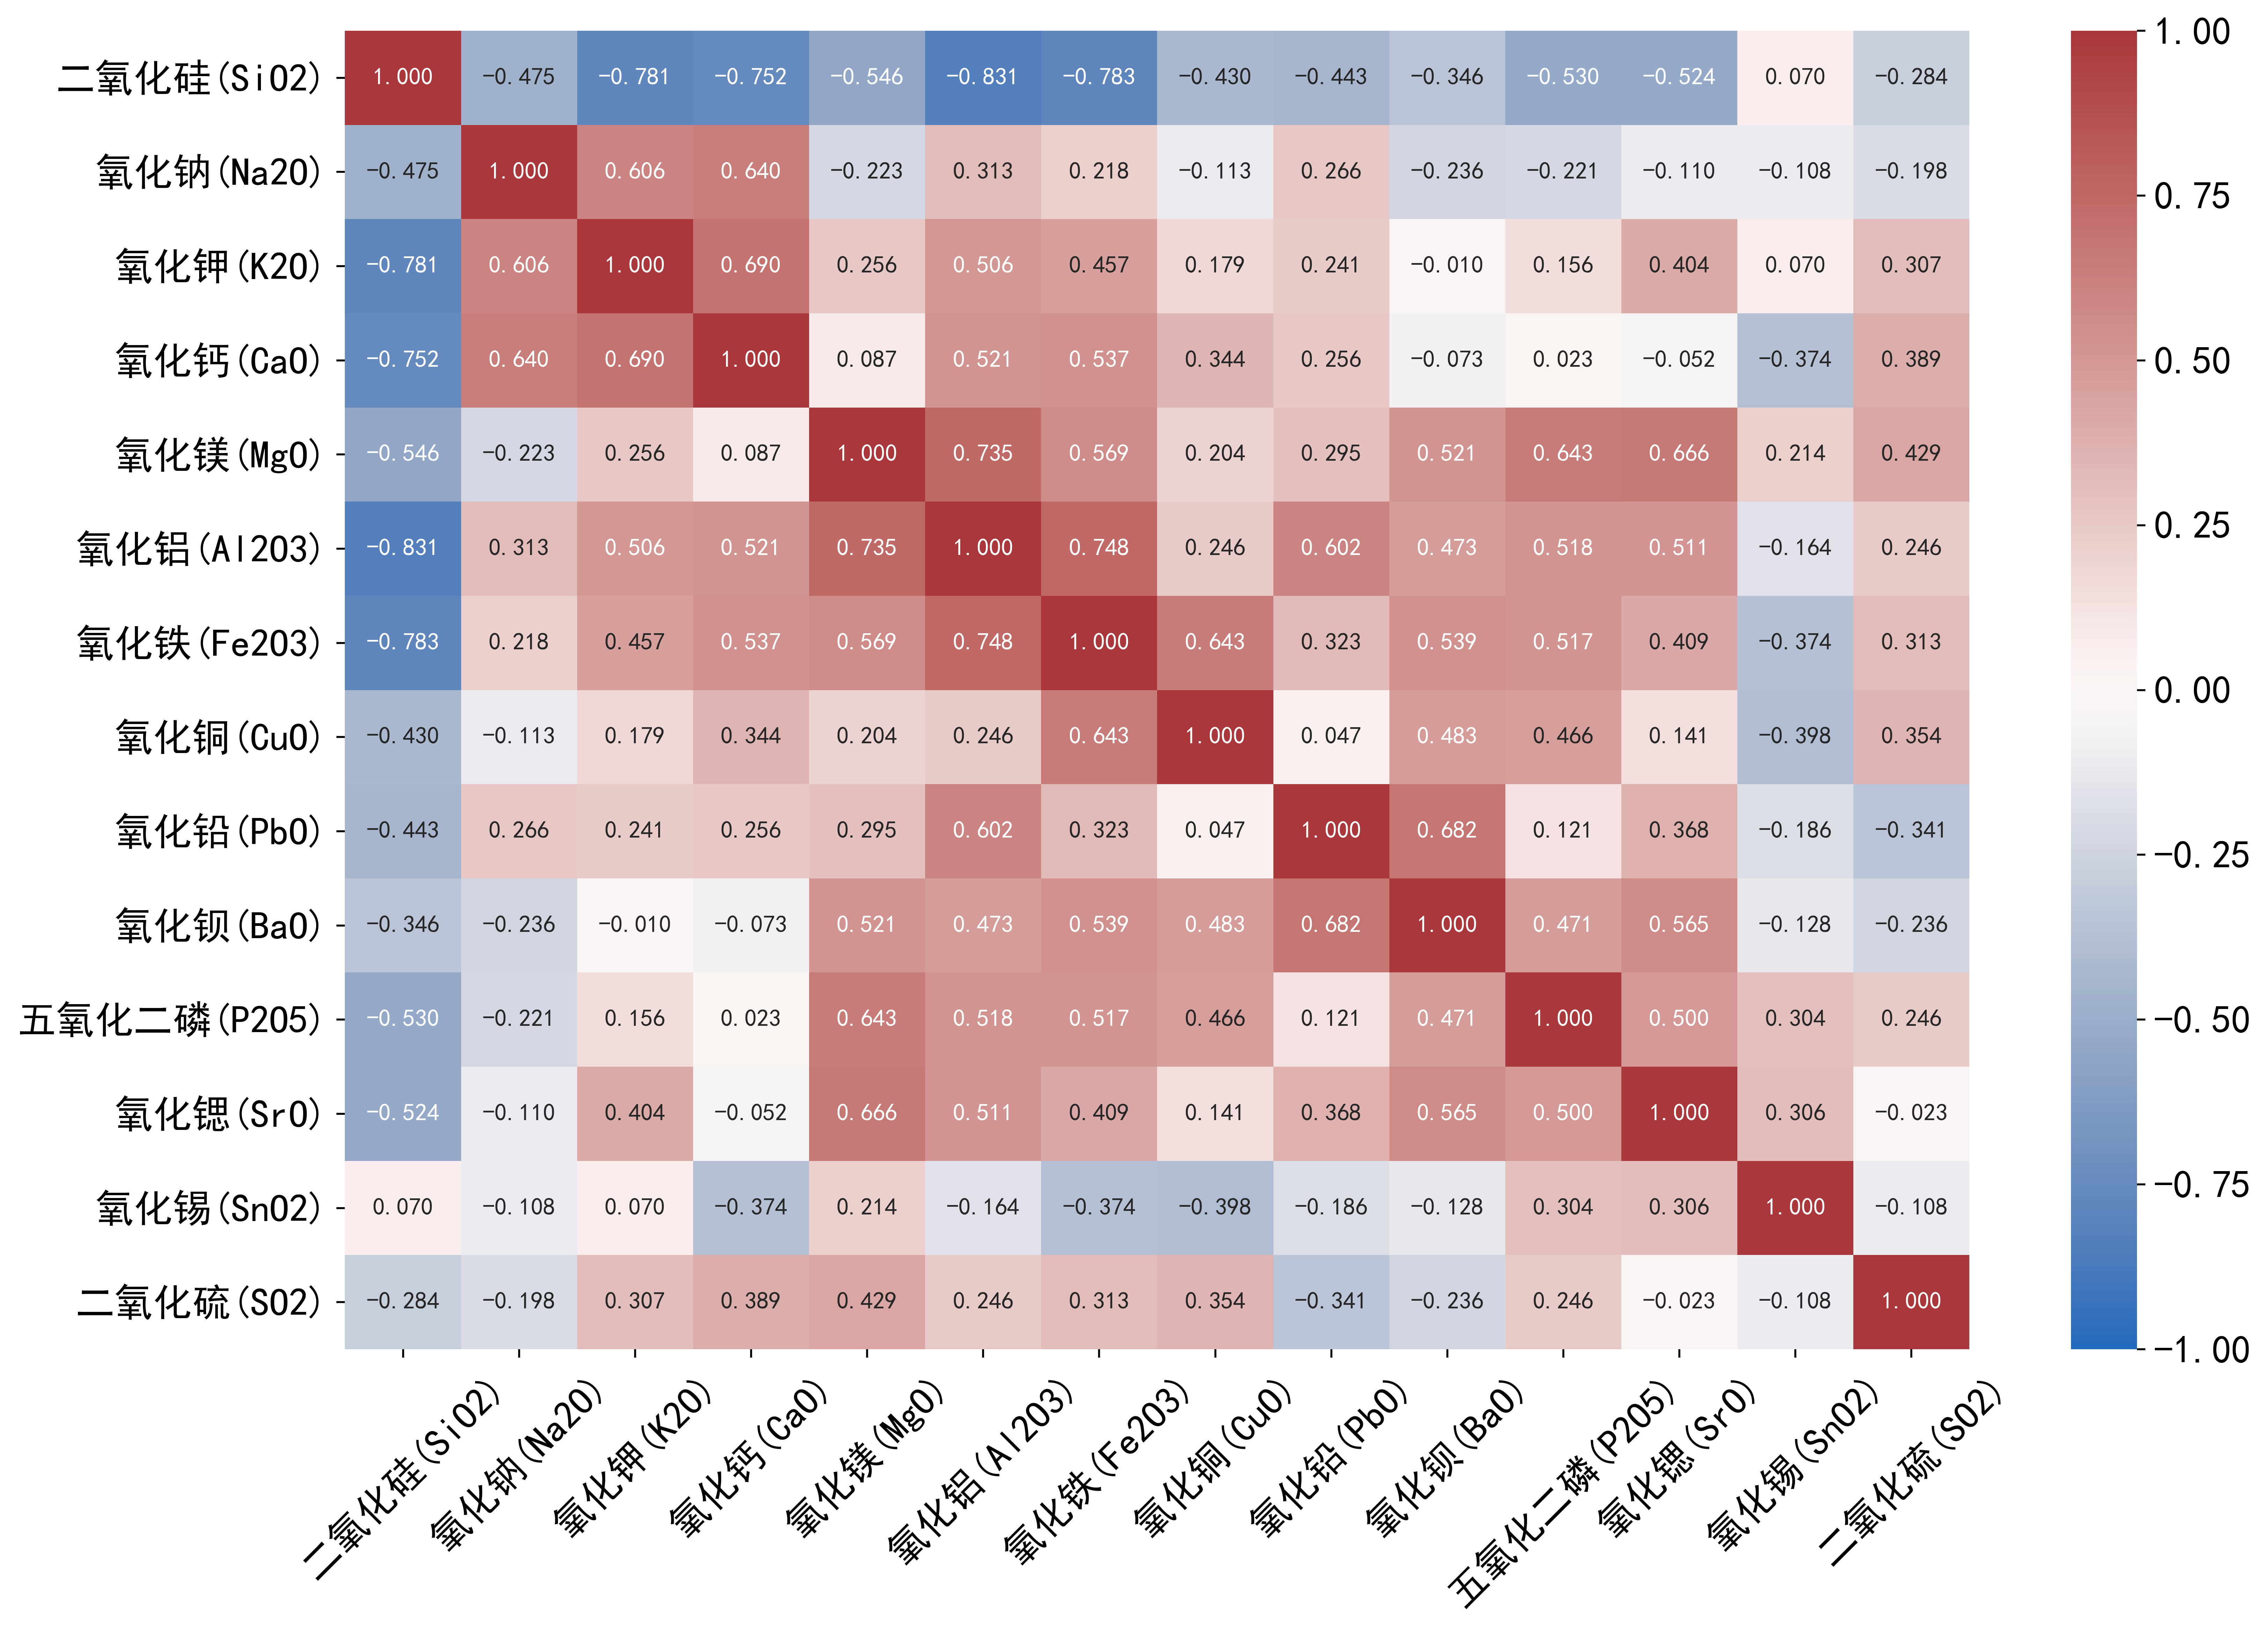

In [13]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(correlations2, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor1.columns, rotation=45)
ax.set_yticklabels(df_cor1.columns, rotation='horizontal')
#plt.savefig('C:/Users/86180/Desktop/C题/image/cor_k')
plt.show()

### 0.01阈值

In [14]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(15,10))
ax = sns.heatmap(cor_k, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(df_cor1.columns, rotation=45)
ax.set_yticklabels(df_cor1.columns, rotation='horizontal')
#plt.savefig('C:/Users/86180/Desktop/C题/image/cor_p')
plt.show()

## 挑出高钾组中相关系数最高的氧化铝及氧化铁作图

In [15]:
df_cor1.columns

Index(['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')

In [17]:
X=df_cor2['氧化铝(Al2O3)']
Y = df_cor2[['氧化铁(Fe2O3)']]
fig = plt.figure(1)

plt.scatter(X,Y,alpha=0.8, marker='o')

plt.xlabel('氧化铝(Al2O3)')
plt.ylabel('氧化铁(Fe2O3)')
plt.title('高钾组氧化铝和氧化铁散点图')


Text(0.5, 1.0, '高钾组氧化铝和氧化铁散点图')